In [2]:
import cPickle as pkl
from cspython.scraper import modifiedSoup
from cspython.data_processing import process_scrapped
import cPickle as pkl
import sys
sys.setrecursionlimit(15000)

import cspython.analysis as a
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib


import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
#import sklearn
#print('sklearn: {}'.format(sklearn.__version__))
#import xlrd

import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

scipy: 0.19.0
numpy: 1.11.3
matplotlib: 2.1.0
pandas: 0.18.1


In [3]:
with open('../scrapped_data/BIG_2016-10-01_to_2017-10-13.pkl', 'rb') as f: 
     d = pkl.load(f)

In [4]:
big_data = process_scrapped(d)
overview, big_data = big_data

In [5]:
def combine_dfs(big_data):
    for l in range(len(big_data.keys())):
        series_data = big_data[big_data.keys()[l]]
        series_data_m = merge_matches(series_data)
        series_data_mo = merge_overview(series_data_m, series_data)
        series_data_mos = merge_scoreboards(series_data_mo, series_data)
        if l == 0:
            data = series_data_mos
        else:
            data = pd.concat([data, series_data_mos])
    return data

In [6]:
def merge_matches(series_data):
    for d in range(0,len(series_data['matches'])):
        if d == 0:
            series_data['matches'][d] = series_data['matches'][d].rename(index = str, columns={ series_data['matches'][d].columns[10] : "team_A", series_data['matches'][d].columns[11] : "team_B" })
            series_data_m = series_data['matches'][d]
        else:
            series_data['matches'][d] = series_data['matches'][d].rename(index = str, columns={ series_data['matches'][d].columns[10] : "team_A", series_data['matches'][d].columns[11] : "team_B" })
            series_data_m = pd.concat([series_data_m, series_data['matches'][d]])
    return series_data_m
    #should work for concact the matches together


In [7]:
def merge_overview(series_data_m, series_data):
    series_data['match_overview'] = series_data['match_overview'].rename(index = str, columns ={series_data['match_overview'].columns[4]: "team_A_score",series_data['match_overview'].columns[5]: "team_B_score"})
    series_data_mo = pd.merge(series_data_m, series_data['match_overview'], on=['match_id', 'winner', 'map', 'series_id'])
    return series_data_mo
#works at merging matches with match_overviewb

In [8]:
def merge_scoreboards(series_data_mo, series_data):    
    for i in range(len(series_data['scoreboards'][0])):
        series_data['scoreboards'][0][i]['match_num'] = i+1
        series_data['scoreboards'][0][i] = series_data['scoreboards'][0][i].rename(index = str, columns={ series_data['scoreboards'][0][i].columns[0] : "team_players" })
        series_data['scoreboards'][1][i]['match_num'] = i+1
        series_data['scoreboards'][1][i] = series_data['scoreboards'][1][i].rename(index = str, columns={ series_data['scoreboards'][1][i].columns[0] : "team_players"})
        new_df = pd.concat([series_data['scoreboards'][0][i], series_data['scoreboards'][1][i]])
        if i == 0:
            con_df = new_df
        else:
            con_df = pd.concat([con_df, new_df])
    series_data_mos = pd.merge(series_data_mo, con_df, how='outer', on='match_num') 
    return series_data_mos

       
        
#works at adding match_num to scoreboards
        
                         

In [9]:
data = combine_dfs(big_data)

In [10]:
data.shape

(28600, 21)

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
data

,map,round_num,half,match_id,series_id,ending,CT,T,side_winner,winner,team_A,team_B,team_A_score,team_B_score,match_num,team_players,K-D,+/-,ADR,KAST,Rating2.0
0,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Jesper 'JW' Wecksell JW,28-16,12,105.2,92.6%,1.72
1,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Jonas 'Lekr0' Olofsson Lekr0,25-17,8,86.8,96.3%,1.47
2,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Freddy 'KRIMZ' Johansson KRIMZ,22-15,7,91.6,77.8%,1.33
3,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Maikil 'Golden' Selim Golden,18-19,-1,76.4,74.1%,1.12
4,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Robin 'flusha' Rönnquist flusha,17-16,1,77.4,77.8%,1.10
5,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Fatih 'gob b' Dayik gob b,18-21,-3,80.8,63.0%,1.05
6,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Johannes 'tabseN' Wodarz tabseN,22-22,0,86.9,63.0%,0.96
7,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Johannes 'nex' Maget nex,15-23,-8,66.6,70.4%,0.83
8,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Nikola 'LEGIJA' Ninić LEGIJA,15-23,-8,63.6,55.6%,0.71
9,Cobblestone,1,1,5d32582c-3318-4f34-8968-37a2fa34c325,c84c39e9-2f4d-497c-9337-0977e2da373c,t_win,BIG,fnatic,T,fnatic,1,0,16,11,1,Kevin 'keev' Bartholomäus keev,12-21,-9,48.9,66.7%,0.62


In [13]:
data = data.join(data['K-D'].str.split('-', 1, expand=True).rename(columns={0:'player_kill', 1:'player_death'}))

In [14]:
data = data.apply(pd.to_numeric, errors='ignore')

In [15]:
data[['map', 'ending', 'CT', 'T', 'side_winner','winner', 'team_players']]= data[['map', 'ending', 'CT', 'T', 'side_winner','winner', 'team_players']].apply(lambda x: pd.factorize(x)[0]) 

In [16]:
data.dtypes

map               int32
round_num         int64
half              int64
match_id         object
series_id        object
ending            int32
CT                int32
T                 int32
side_winner       int32
winner            int32
team_A            int64
team_B            int64
team_A_score      int64
team_B_score      int64
match_num         int64
team_players      int32
K-D              object
+/-               int64
ADR             float64
KAST             object
Rating2.0       float64
player_kill       int64
player_death      int64
dtype: object

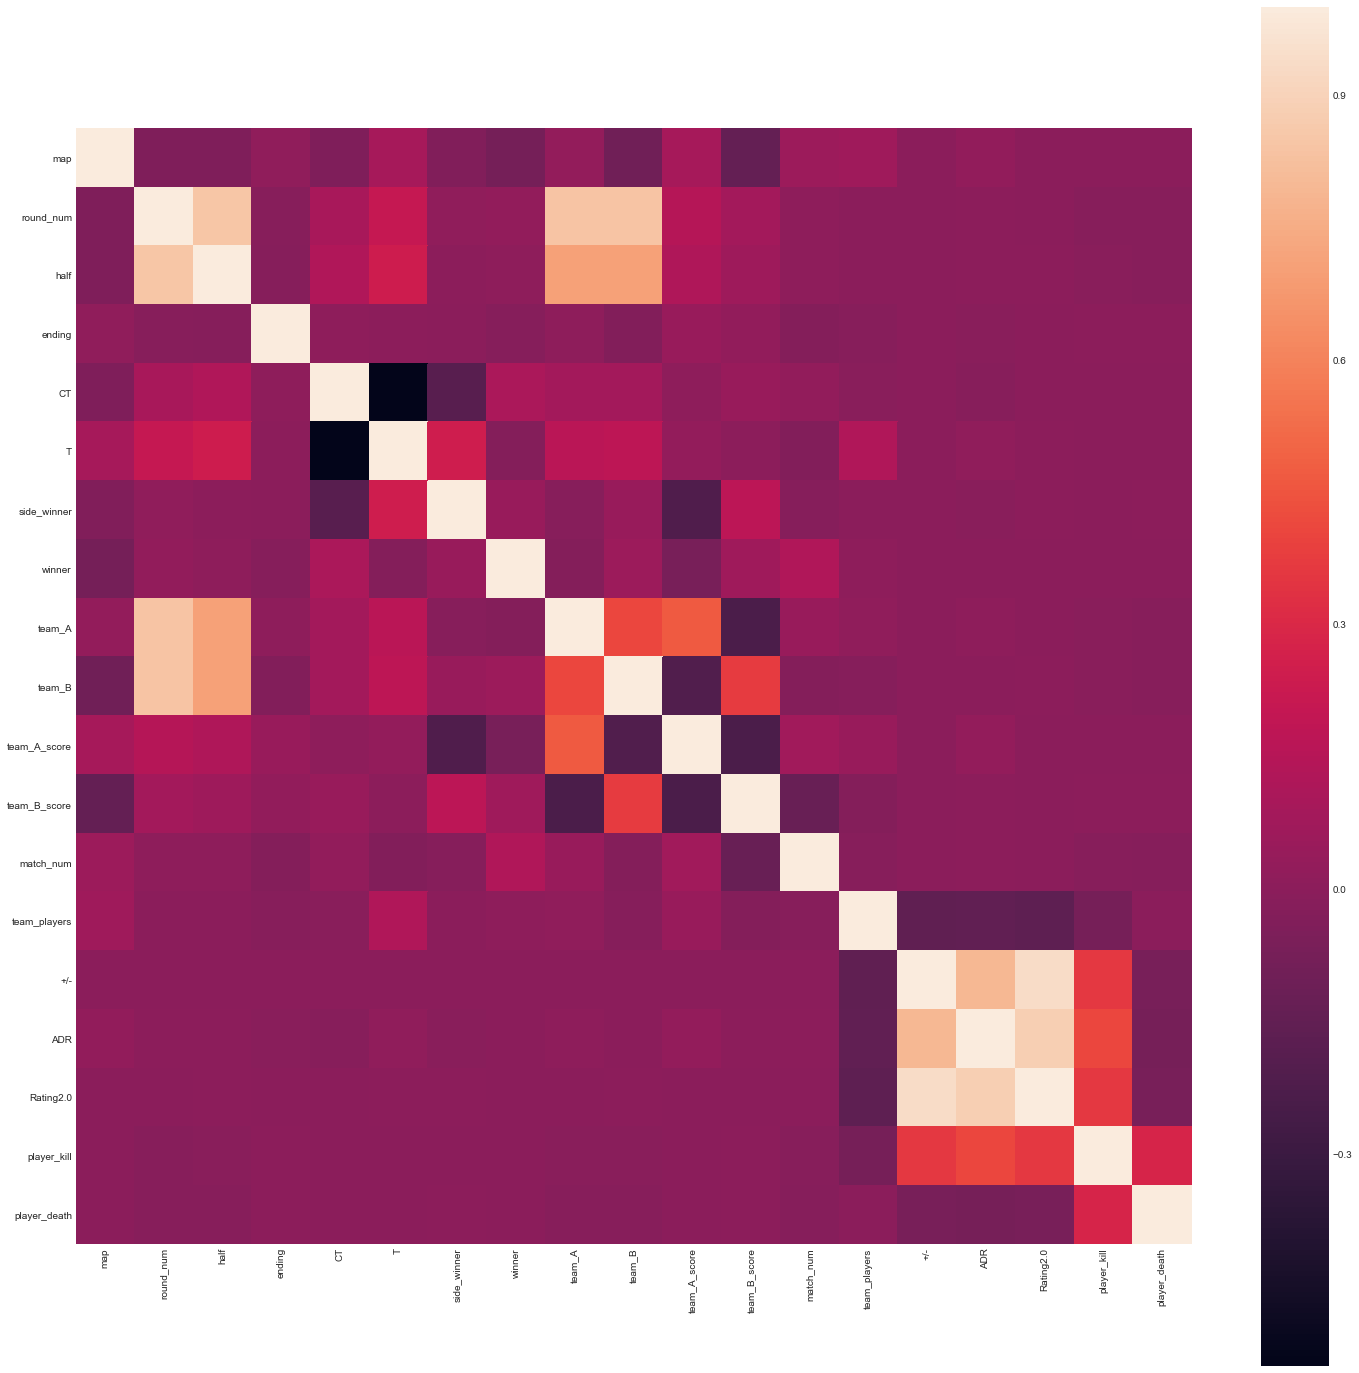

In [17]:
corr = data.select_dtypes(include = ['float64', 'int64', 'int32']).iloc[:, 0:].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, vmax=1, square=True)

